# EWMA

### Importing packages
The basic packages like numpy and pandas are imported for dealing with data. To help with plotting, the matplotlib package is imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Analyze data
The dataset used will be sales data. It is a univariate dataset which has the month and sales column. The data is read and 'Month' column is mentioned as the index column.

In [2]:
df = pd.read_csv('sales.csv',index_col='Month')

In [3]:
df.head()

,Sales
Month,
2001-01,266.0
2001-02,145.9
2001-03,183.1
2001-04,119.3
2001-05,180.3


Now the 'Month' column is changed to a datetime index so as to help with the further process.

In [4]:
df.index = pd.to_datetime(df.index)
df.head()

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


### Creating SMA
The SMA can be created by adding an extra column and using the 'rolling' function and mention the window as 6 for 6 months and 12 for 12 months.

In [5]:
df['6SMA'] = df['Sales'].rolling(window=6).mean()
df.head()

,Sales,6SMA
Month,,
2001-01-01,266.0,NaN
2001-02-01,145.9,NaN
2001-03-01,183.1,NaN
2001-04-01,119.3,NaN
2001-05-01,180.3,NaN


In [6]:
df['12SMA'] = df['Sales'].rolling(window=12).mean()
df.head()

,Sales,6SMA,12SMA
Month,,,
2001-01-01,266.0,NaN,NaN
2001-02-01,145.9,NaN,NaN
2001-03-01,183.1,NaN,NaN
2001-04-01,119.3,NaN,NaN
2001-05-01,180.3,NaN,NaN


<AxesSubplot:xlabel='Month'>

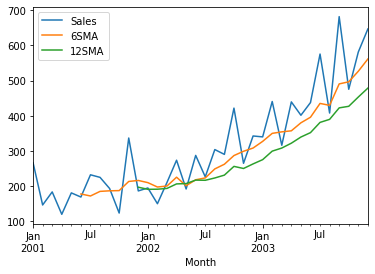

In [7]:
df.plot()

Take a note that, here while plotting SMA there is a lag initially. When the EWMA is plotted, this lag won't be there.

### Creating EWMA
The 'ewm' function is called to find the EWMA. The 'span' argument takes in the period like 12 for 12 months. 

<AxesSubplot:xlabel='Month'>

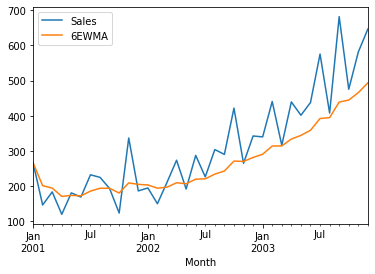

In [8]:
df['6EWMA'] = df['Sales'].ewm(span=12).mean()
df[['Sales','6EWMA']].plot()